In [2]:
import os
import zipfile

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/kaggle_dataset'

In [5]:
%cd /content/gdrive/MyDrive/kaggle_dataset

/content/gdrive/MyDrive/kaggle_dataset


In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10

 99% 582M/586M [00:03<00:00, 168MB/s]
100% 586M/586M [00:03<00:00, 188MB/s]


In [6]:
Zip_ref = zipfile.ZipFile("/content/gdrive/MyDrive/kaggle_dataset/animals10.zip")
Zip_ref.extractall("/tmp")
Zip_ref.close()

DATA HAS BEEN DOWNLOADED
RUN OUR CODE FROM HERE

In [7]:
folderDirectory ="/tmp/raw-img"
class_names = os.listdir(folderDirectory)
class_names.sort()
print(class_names)

['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']


In [8]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2
import imghdr
import shutil
import random as rn
from tqdm import tqdm
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [9]:
data = tf.keras.utils.image_dataset_from_directory(folderDirectory)

Found 26179 files belonging to 10 classes.


In [10]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2)
test_size = int(len(data) * .1)

In [11]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [12]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [13]:
img_height = 256
img_width = 256

In [14]:
model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)))
model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation = 'softmax'))

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 256, 256, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        1

In [17]:
history = model.fit(
    train,
    batch_size = 32,
    epochs = 10,
    validation_data = val,
    validation_steps = 1
)

Epoch 1/10
573/573 [==============================] - 28s 32ms/step - loss: 1.6782 - accuracy: 0.4164 - val_loss: 0.7759 - val_accuracy: 0.8125
Epoch 2/10
573/573 [==============================] - 18s 31ms/step - loss: 1.1561 - accuracy: 0.6066 - val_loss: 0.9765 - val_accuracy: 0.7812
Epoch 3/10
573/573 [==============================] - 18s 31ms/step - loss: 0.8595 - accuracy: 0.7111 - val_loss: 1.1901 - val_accuracy: 0.5625
Epoch 4/10
573/573 [==============================] - 18s 31ms/step - loss: 0.6087 - accuracy: 0.7949 - val_loss: 0.6456 - val_accuracy: 0.8125
Epoch 5/10
573/573 [==============================] - 18s 31ms/step - loss: 0.3797 - accuracy: 0.8714 - val_loss: 0.3044 - val_accuracy: 0.8750
Epoch 6/10
573/573 [==============================] - 18s 31ms/step - loss: 0.2292 - accuracy: 0.9232 - val_loss: 0.3389 - val_accuracy: 0.9375
Epoch 7/10
573/573 [==============================] - 18s 31ms/step - loss: 0.1638 - accuracy: 0.9456 - val_loss: 0.1157 - val_accuracy:

In [18]:
score = model.evaluate(train)
print("Total loss on Training set: ", score[0])
print("Accuracy of Training set: ", score[1])

573/573 [==============================] - 9s 15ms/step - loss: 0.1302 - accuracy: 0.9575
Total loss on Training set:  0.13019779324531555
Accuracy of Training set:  0.957515299320221


In [19]:
score = model.evaluate(val)
print("Total loss on Validation set: ", score[0])
print("Accuracy of Validation set: ", score[1])

163/163 [==============================] - 10s 14ms/step - loss: 2.4296 - accuracy: 0.6407
Total loss on Validation set:  2.429631471633911
Accuracy of Validation set:  0.6407208442687988


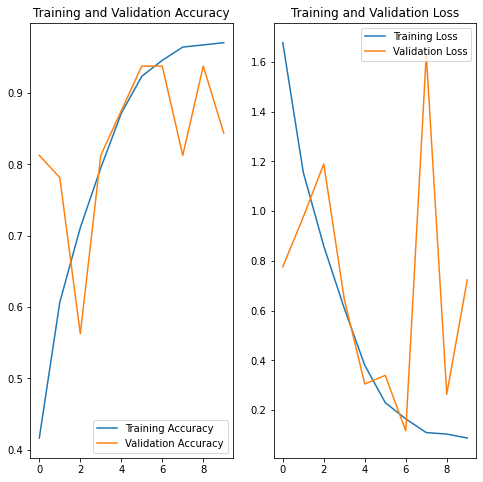

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


SECOND ATTEMPT WITH DATA AUGMENTAION AND DROPUT


In [21]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [22]:
model = Sequential()
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape = (img_height, img_width, 3)))
model.add(data_augmentation)
model.add(keras.layers.Conv2D(16, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(32, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Conv2D(128, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D())
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(len(class_names), activation = 'softmax'))

In [23]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
history = model.fit(
    train,
    batch_size = 32,
    epochs = 25,
    validation_data = val,
    validation_steps = 1
)

Epoch 1/25
573/573 [==============================] - 26s 46ms/step - loss: 0.5955 - accuracy: 0.7968 - val_loss: 0.5215 - val_accuracy: 0.8125
Epoch 2/25
573/573 [==============================] - 26s 46ms/step - loss: 0.5782 - accuracy: 0.8032 - val_loss: 0.8433 - val_accuracy: 0.7812
Epoch 3/25
573/573 [==============================] - 26s 45ms/step - loss: 0.5812 - accuracy: 0.8027 - val_loss: 1.0274 - val_accuracy: 0.5938
Epoch 4/25
573/573 [==============================] - 26s 45ms/step - loss: 0.5640 - accuracy: 0.8135 - val_loss: 0.8202 - val_accuracy: 0.7188
Epoch 5/25
573/573 [==============================] - 26s 46ms/step - loss: 0.5545 - accuracy: 0.8134 - val_loss: 0.6024 - val_accuracy: 0.7500
Epoch 6/25
573/573 [==============================] - 26s 46ms/step - loss: 0.5454 - accuracy: 0.8133 - val_loss: 0.5654 - val_accuracy: 0.8125
Epoch 7/25
573/573 [==============================] - 26s 46ms/step - loss: 0.5377 - accuracy: 0.8165 - val_loss: 0.3377 - val_accuracy:

In [26]:
score = model.evaluate(train)
print("Total loss on Training set: ", score[0])
print("Accuracy of Training set: ", score[1])

573/573 [==============================] - 9s 15ms/step - loss: 0.4488 - accuracy: 0.8454
Total loss on Training set:  0.4487924575805664
Accuracy of Training set:  0.845440685749054


In [27]:
score = model.evaluate(val)
print("Total loss on Validation set: ", score[0])
print("Accuracy of Validation set: ", score[1])

163/163 [==============================] - 10s 14ms/step - loss: 0.9605 - accuracy: 0.7327
Total loss on Validation set:  0.9604636430740356
Accuracy of Validation set:  0.7327454090118408


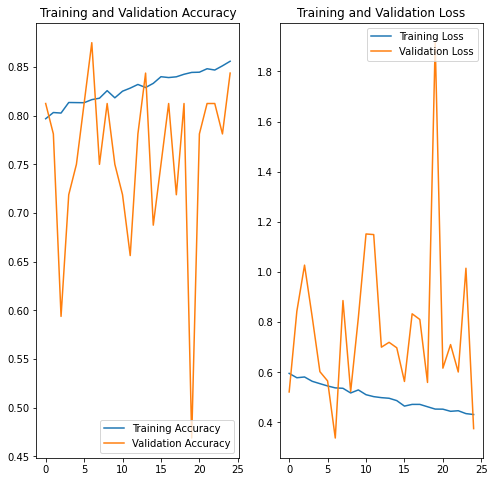

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(25)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [29]:
score = model.evaluate(test)
print("Total loss on Test set: ", score[0])
print("Accuracy of Test set: ", score[1])

81/81 [==============================] - 10s 14ms/step - loss: 0.9790 - accuracy: 0.7249
Total loss on Test set:  0.9789593815803528
Accuracy of Test set:  0.7249228358268738
